In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

 The goal is to help a retail store manage inventory and predict sales over time.

In [27]:
data = pd.read_csv('walmart.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


 Description of the Columns:
Store : the store number.

Date : the week of sales.

Weekly_Sales : the weekly sales for the given store.

Holiday_Flag : whether the week is a special holiday week or not (1 = holiday week; 0 = non-holiday week).

Temperature : average temperature in the region for the given week.

Fuel_Price : cost of fuel in the region for the given week.

CPI : the consumer price index for the given week.

Unemployment : the unemployment rate for the region for the given week.



In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


---->Date column data type needs to be changed.

---->No null values are present in our data.

In [29]:
data['Date'] = pd.to_datetime(data['Date'], format= '%d-%m-%Y')


In [30]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [31]:
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [32]:
#lets extract dates from the date column
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data["Date"].dt.month
data['Year'] = data['Date'].dt.year

In [33]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayOfWeek,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [34]:
#lets perform some EDA

#ranking stores in decending of weeklysales totals
data[['Store','Weekly_Sales']].groupby(['Store'],as_index=True).mean().sort_values(by = 'Weekly_Sales',ascending=False)

,Weekly_Sales
Store,
20,2.107677e+06
4,2.094713e+06
14,2.020978e+06
13,2.003620e+06
2,1.925751e+06
10,1.899425e+06
27,1.775216e+06
6,1.564728e+06
1,1.555264e+06


The Top performing stores with maximum sales are store no: (20, 4, 14, 13)

The bottom performing sstores with minimum sales are store no: (33, 44, 5, 36)

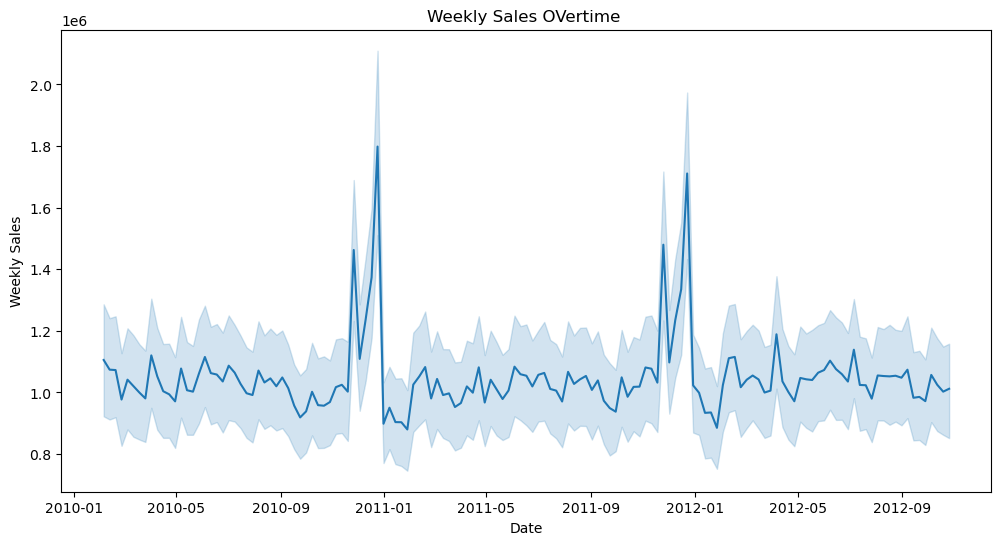

In [35]:
#lets perform soem vizualization 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Date',y='Weekly_Sales')
plt.title("Weekly Sales OVertime ")
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

The spike in sales is seen during the festive seasons that is from nov month and significantly drop in the month of january

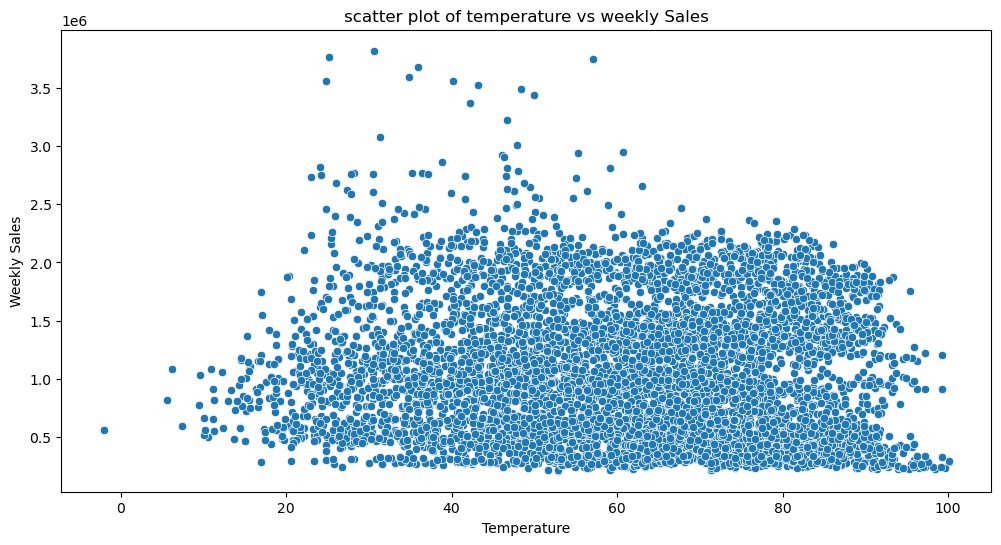

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data,x='Temperature',y='Weekly_Sales')
plt.title("scatter plot of temperature vs weekly Sales")
plt.xlabel('Temperature')
plt.ylabel("Weekly Sales")
plt.show()

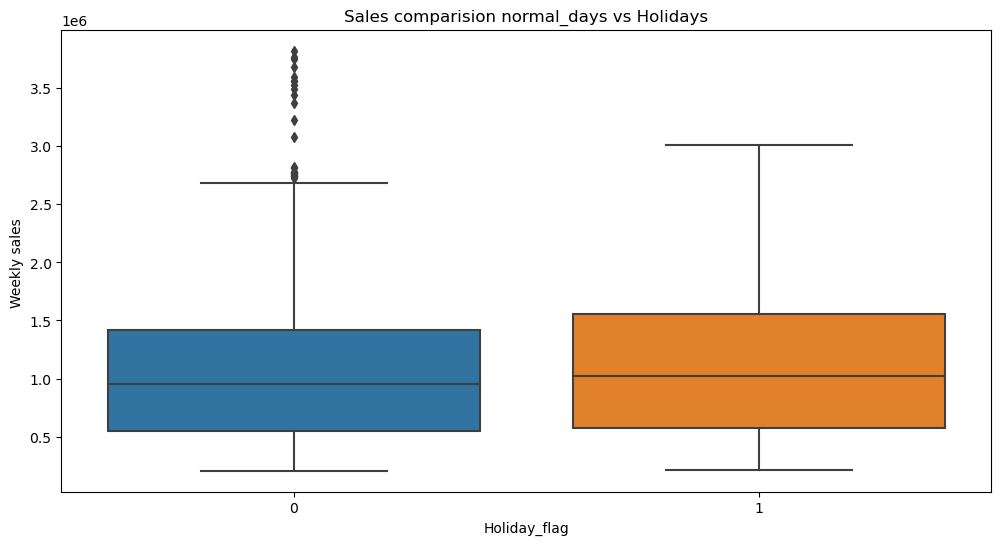

In [37]:
#lets compare sales during holidays and normal-holidays 

plt.figure(figsize=(12,6))
sns.boxplot(data=data,x='Holiday_Flag',y='Weekly_Sales')
plt.title("Sales comparision normal_days vs Holidays")
plt.xlabel("Holiday_flag")
plt.ylabel("Weekly sales ")
plt.show()


Average sales are higher during holidays as compared to non-holiday days

According to the analysis, sales figures tend to be highest towards the end of the year, notably during the Christmas, 
New Year, and Thanksgiving period. The sales show a surge starting from november till the starting on january.  

<Axes: xlabel='Month'>

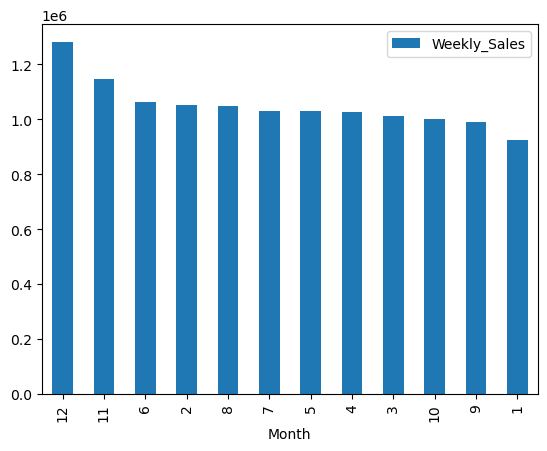

In [38]:
data[['Month','Weekly_Sales']].groupby(['Month'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False).plot.bar()

In [42]:
data[['Year','Weekly_Sales']].groupby(['Year'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False)

,Weekly_Sales
Year,
2010,1.059670e+06
2011,1.046239e+06
2012,1.033660e+06


In [43]:
data[['Year','CPI']].groupby(['Year'],as_index=True).mean().sort_values(by='CPI',ascending=False)

,CPI
Year,
2012,175.498781
2011,171.545716
2010,168.101782


There was a decrease in yearly sales between 2010 to 2012 which corresponds to the increase in consumer Price Index which 
indicates less buying power from the customers.

In [44]:
#Correlation Analysis
correlation_matrix = data.corr()

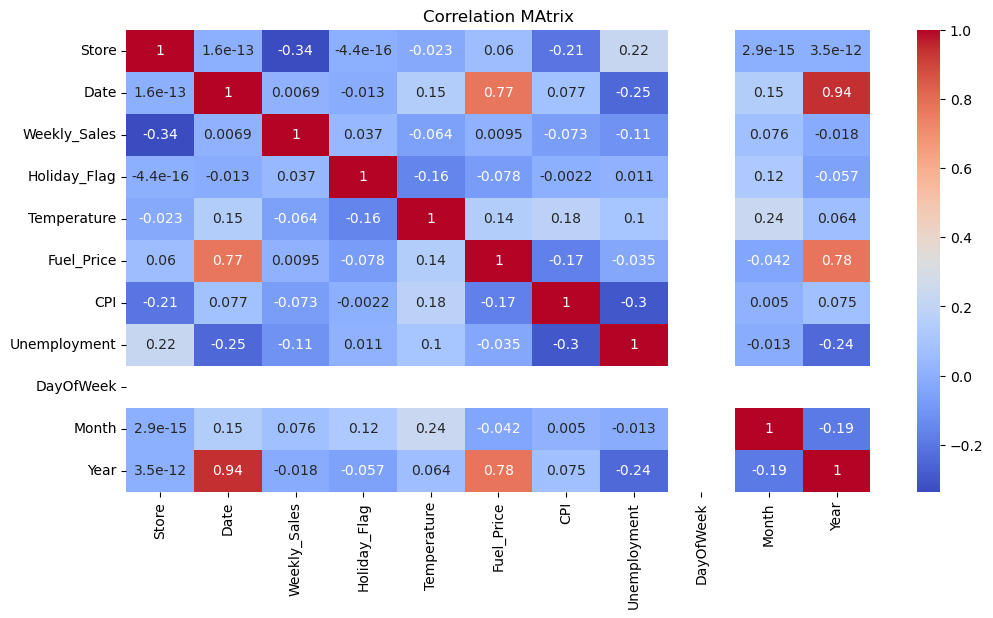

In [45]:
#correlation matrix 
correlation_matrix = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation MAtrix")
plt.show()

CPI and Unemployment: CPI and Unemployment exhibit a negative correlation(-0.3). This is expected, as higher unemployment rates often result in lower consumer price index values. This correlation suggests an inverse relationship between consumer prices and unemployment rates.

weekly sales and Unemployment:
The correlation analysis reveals a slight negative correlation of approximately -0.11 between the Unemployment Rate and weekly sales. An increase in the Unemployment Rate is associated with a modest decrease in weekly sales.

Consumer Price Index (CPI) and Weekly Sales:
A nuanced negative correlation (-0.073) suggests that fluctuations in the Consumer Price Index (CPI) correspond to modest variations in weekly sales.

Fuel Prices and Weekly Sales:
A weak positive correlation (0.0095) indicates that fuel prices alone are not robust predictors of variations in weekly sales.

Temperature and Weekly Sales:
A delicate negative correlation (-0.064) implies a minor impact of temperature on weekly sales. Note that correlation doesn't imply causation, and unexplored variables may contribute more substantially to sales variations.

# Time Series Analysis

In [46]:
#vizualizing the trend ,seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Weekly_Sales'],period=7)
trend= decomposition.trend
seasonal= decomposition.seasonal
residual = decomposition.resid




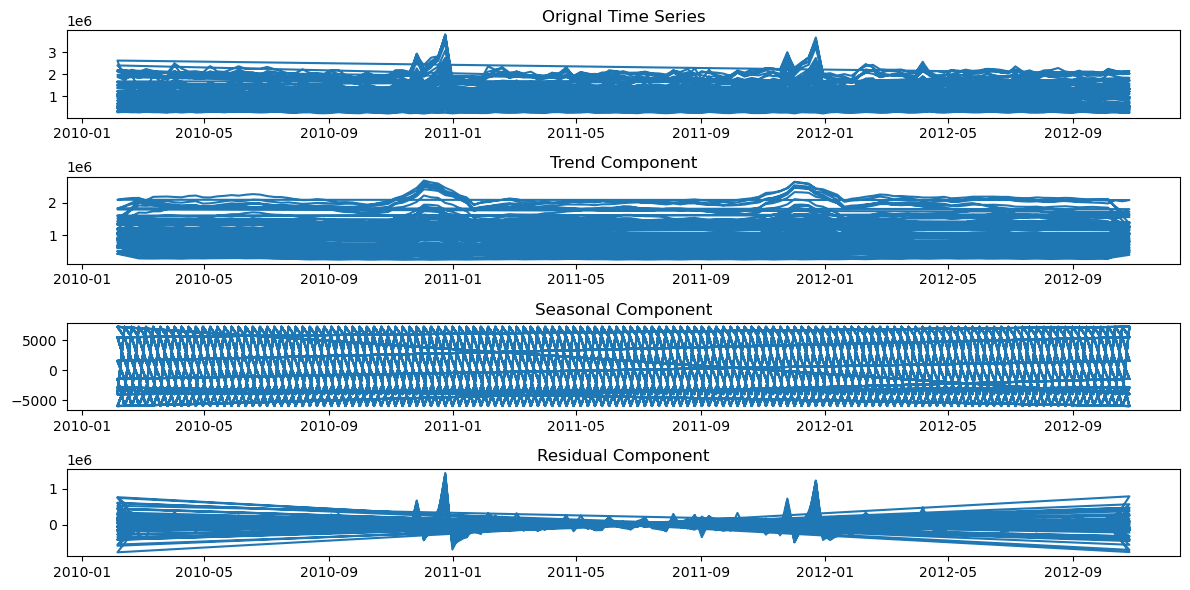

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(data['Date'], data['Weekly_Sales'], label='Orignal')
plt.title("Orignal Time Series")

plt.subplot(412)
plt.plot(data['Date'],trend,label='Trend')
plt.title("Trend Component")

plt.subplot(413)
plt.plot(data['Date'], seasonal, label='Seasonal')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(data['Date'],residual,label='Residual')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

The "orignal time series" shows the observed weekly sales data.

The trend component shows a upward trend over the festive season(nov-dec)months.

The seasonal component plot shows montly seasonaltiy upward and downword trend.

#MACHINE learning Modeling 

 have decided to use three models 
 
 
 1. Linear Regression
 
 2. Random Forest Regressor
 
 3. SARIMA

lets compare the three models and pick the best one.

In [48]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'DayOfWeek', 'Month', 'Year'],
      dtype='object')

In [49]:
#split the data into feature and target variable
x=data[['Store','Holiday_Flag','CPI','DayOfWeek','Month','Year']]
y=data['Weekly_Sales']

In [50]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [51]:
#linear regression model
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [54]:
#lets store the coefficient of the linear regression model
coefficients= pd.DataFrame({'Features':x.columns,'Coefficient': linear_model.coef_ })
coefficients = coefficients.sort_values(by='Coefficient',ascending=False)
print("Linear regression coefficients: ")
print(coefficients)

Linear regression coefficients: 
       Features   Coefficient
1  Holiday_Flag  63788.274550
4         Month  13672.816938
5          Year   4234.399236
3     DayOfWeek      0.000000
2           CPI  -2086.117479
0         Store -15714.226155


In [55]:
#predict
y_pred_linear = linear_model.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

mse_linear = mean_squared_error(y_test,y_pred_linear)
mae_linear = mean_absolute_error(y_test,y_pred_linear)
r2_linear = r2_score(y_test,y_pred_linear)

print(f'Linear Regression mean squared error: {mse_linear}')
print(f'Linear regression mean absolute error: {mae_linear}')
print(f'Linear regression r_squared: {r2_linear}')

Linear Regression mean squared error: 274358062063.70123
Linear regression mean absolute error: 434468.7630628272
Linear regression r_squared: 0.14836512598967277


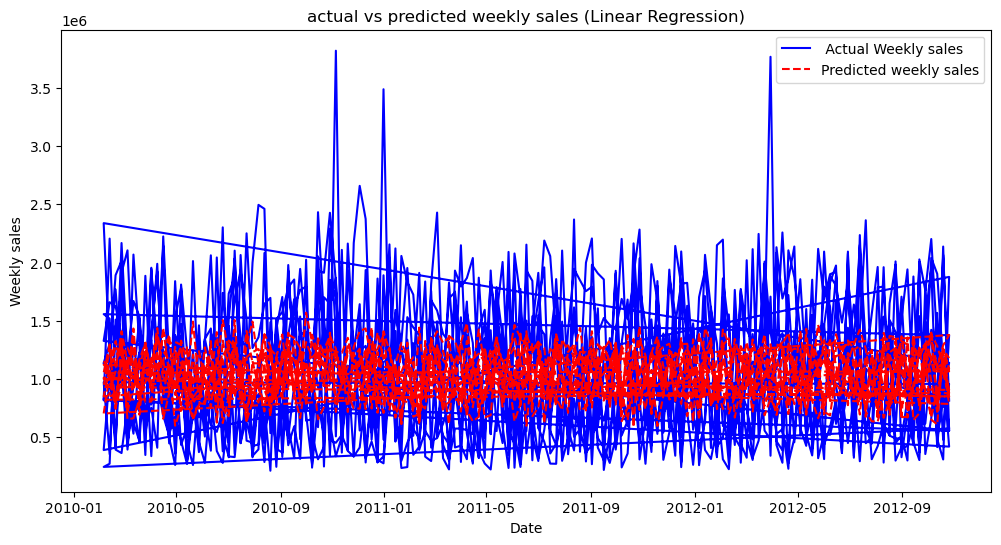

In [57]:
#plot actual vs predicted sales for linear regression 
plt.figure(figsize=(12,6))
plt.plot(data['Date'][len(data)-len(y_test):],y_test,label=' Actual Weekly sales',color= 'blue' )
plt.plot(data['Date'][len(data)-len(y_test):],y_pred_linear,label='Predicted weekly sales',color ='red',linestyle='--' )
plt.title("actual vs predicted weekly sales (Linear Regression)")
plt.xlabel('Date')
plt.ylabel('Weekly sales')
plt.legend()
plt.show()

In [58]:
#Random forest regressor 
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators =100,random_state=42)


In [59]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [60]:
#predict
y_pred_rf = rf_model.predict(X_test)

In [61]:
#metrics for random foret model
mse_rf = mean_squared_error(y_test,y_pred_rf)
mae_rf = mean_absolute_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)

print(f'random forest mean squared error: {mse_rf}')
print(f'random forest mean absolute error: {mae_rf}')
print(f'random forest R_squared: {r2_rf}')

random forest mean squared error: 18565147603.976215
random forest mean absolute error: 70494.92054607614
random forest R_squared: 0.9423719244050338


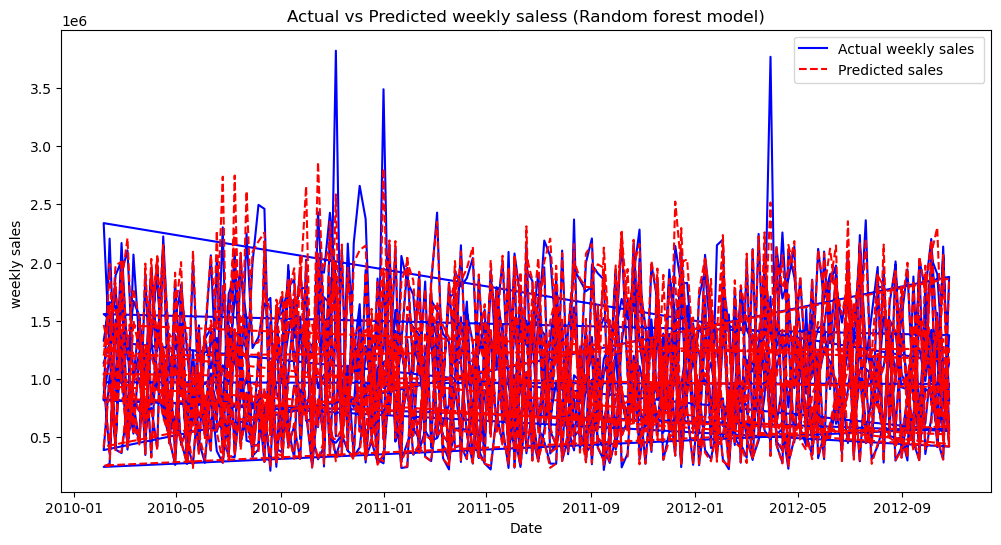

In [62]:
#plot actual vs predicted sales for random forest model 
plt.figure(figsize=(12,6))
plt.plot(data['Date'][len(data)-len(y_test):],y_test, label = "Actual weekly sales ",color = 'blue' )
plt.plot(data['Date'][len(data)- len(y_test):],y_pred_rf, label="Predicted sales",color='red',linestyle='--' )
plt.title("Actual vs Predicted weekly saless (Random forest model)")
plt.xlabel("Date")
plt.ylabel("weekly sales ")
plt.legend()
plt.show()

In [63]:
#get feature importance for random forest
rf_feature_importance = rf_model.feature_importances_

#pair feature names
feature_names=x.columns
rf_feature_importance_dict = dict(zip(feature_names,rf_feature_importance))
# lets sort feature by importance in decending order
rf_sorted_feature_importance = sorted(rf_feature_importance_dict.items(),key=lambda x: x[1], reverse=True)
print('Random Forest Feature Importance: ')
for feature, importance in rf_sorted_feature_importance:
    print(f'{feature}:{importance}')

Random Forest Feature Importance: 
Store:0.764231221832417
CPI:0.18648012826680344
Month:0.037763010795528025
Holiday_Flag:0.006533810476728712
Year:0.004991828628522889
DayOfWeek:0.0


In [64]:
#Time Series Forecasting- SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [65]:
#sort the data by date for time series forecasting 
data.sort_values('Date',inplace=True)


In [66]:
sarima_model = SARIMAX(data['Weekly_Sales'],order=(1,1,1),seasonal_order=(1,1,1,12) )
sarima_result= sarima_model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
#predictions on training data
y_pred_sarima_training = sarima_result.predict(start=0,end = len(X_train)-1)


In [68]:
#lets check accuracy
mse_sarima_training = mean_squared_error(y_train,y_pred_sarima_training)
mae_sarima_training = mean_absolute_error(y_train,y_pred_sarima_training)

print(f'Mean squared error on training data {mse_sarima_training}')
print(f'Mean abosolute error on training data: {mae_sarima_training}')

Mean squared error on training data 333446742066.63904
Mean abosolute error on training data: 476755.1042834359


In [69]:
#lets forecast future sales using sarima on test data 
future_sales_sarima = sarima_result.forecast(steps=len(X_test))
future_data= X_test.copy()
future_data['Predicted_weekly_sales_sarima'] =future_sales_sarima

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [70]:
#lets check accuracy fo test data 
mse_sarima = mean_squared_error(y_test,future_sales_sarima)
mae_sarima = mean_absolute_error(y_test,future_sales_sarima)
r2_sarima = r2_score(y_test,future_sales_sarima)

print(f'sarima mean squared error on test data: {mse_sarima}')
print(f'sarima mean absolute error on test data: {mae_sarima}')
print(f'sarima R Squared on test data: {r2_sarima}')

sarima mean squared error on test data: 326098736766.5424
sarima mean absolute error on test data: 472424.6316546482
sarima R Squared on test data: -0.012243104912368574


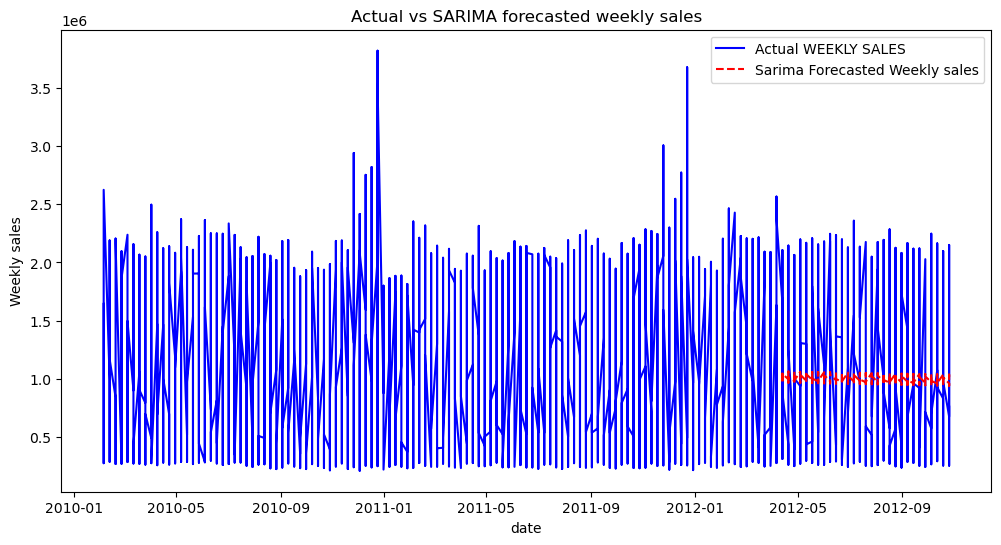

In [71]:
#plot actual vs predicted sales for sarima 
plt.figure(figsize=(12,6))
#aactual sales
plt.plot(data['Date'],data['Weekly_Sales'],label="Actual WEEKLY SALES ", color = 'blue' )
#sarima forecast for future data
plt.plot(data['Date'].iloc[-len(X_test):],future_sales_sarima,label='Sarima Forecasted Weekly sales' ,color='red',linestyle='--' )
plt.title('Actual vs SARIMA forecasted weekly sales')
plt.xlabel('date')
plt.ylabel('Weekly sales')
plt.legend()
plt.show()

# Comparing all three models 

In [72]:
print(f'Linear Regressor mean Squared Error (MSE): {mse_linear}')
print(f'Random Forest mean squared error (MSE): {mse_rf}')
print(f'SARIMA Mean Squared Error (MSE); {mse_sarima}')

Linear Regressor mean Squared Error (MSE): 274358062063.70123
Random Forest mean squared error (MSE): 18565147603.976215
SARIMA Mean Squared Error (MSE); 326098736766.5424


#Random forest model gives the best results with the lowest MSE and an R2 value of 0.9423719244050338

#Linear regression has an MSE 274358062063.70123 and an r2 value of 0.14836512598967277 which shows that the data is non-linear
and does not fit a linear Model

#the SARIMA model  gives  the worst results but with some changes it can be improved to give better  results 

CONCLUSION:
The Walmart Inventory Management project has been a comprehensive exploration into the intricate dynamics of sales forecasting, leveraging data-driven methodologies to optimize inventory strategies. Throughout this endeavor, several key findings and insights have come to light.

Insights from the Analysis:
Seasonal Patterns: The project uncovered significant seasonal patterns in sales, with a notable spike during the festive seasons from November to January. This surge in sales, particularly around holidays such as Christmas and Thanksgiving, underscores the influence of external events on consumer spending.

Model Performances: The evaluation of three distinct models—Linear Regression, Random Forest, and SARIMA—revealed varying levels of effectiveness. The Random Forest model emerged as the most robust performer, showcasing superior accuracy in predicting weekly sales.

Feature Importance: The Random Forest model identified key features such as store number and Consumer Price Index (CPI) as crucial contributors to sales. This feature importance analysis provides actionable insights for refining inventory management strategies.

Temporal Patterns: Time series analysis using SARIMA unveiled clear temporal patterns in weekly sales, enabling the model to capture seasonality for more accurate predictions.

Future Directions:
As we conclude this phase of the project, it's essential to outline potential future directions that could further enhance the efficacy of our models and forecasting capabilities:

Model Refinement: Continued efforts in refining the SARIMA model, experimenting with hyperparameters, and incorporating additional features for improved accuracy.

Ensemble Modeling: Exploring ensemble modeling techniques to harness the strengths of different models and create a more robust predictive system.

External Factors Integration: Integrating external factors like promotional events, economic indicators, and regional dynamics to augment the models' predictive capabilities.

Dynamic Feature Engineering: Ongoing development of dynamic feature engineering strategies to adapt the models to evolving consumer behavior and market dynamics.

User Interface Development: Creating an intuitive user interface for stakeholders to interact with the models, visualize predictions, and gain actionable insights.

Scenario Analysis: Conducting scenario analyses to assess the impact of potential external shocks or unforeseen events on sales, facilitating proactive adjustments to inventory management strategies.

Collaboration with Supply Chain: Strengthening collaboration with supply chain management to align inventory levels with forecasted sales, optimizing stocking strategies for different stores and regions.

Closing Thoughts:
In conclusion, this project has not only provided valuable insights into the patterns and trends shaping Walmart's sales landscape but has also laid the groundwork for a dynamic and responsive inventory management system. The journey doesn't end here; rather, it evolves into a continuous pursuit of refinement and adaptation to ensure our models stay at the forefront of predicting and meeting consumer demands. As we navigate the ever-changing retail landscape, the project serves as a testament to the power of data-driven decision-making in enhancing operational efficiency and strategic planning.